In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('multiclass_text_classification.csv').drop('Unnamed: 0', axis = 1)
df

,created_date,profile_name,created_hour,created_weekday,favorite_count,retweet_count,source_device,tweet_text,length,spaces,uppers,punctuations,questionsmark,explainations,day_part,hashtags,mentions,clean_tweet,polarity_class,subjectivity_class
0,2020-12-20 19:23:18,Donald Trump,19,6,68330,19058,iPhone,https://t.co/8S0ePCOCOG,0,0,0,0,0,0,Evening,NaN,NaN,NaN,Neutral,Objective
1,2020-12-20 17:51:12,Donald Trump,17,6,106968,32162,iPhone,Wow! https://t.co/gAttnzPa5d,5,1,1,1,0,1,Evening,NaN,NaN,wow,Positive,Subjective
2,2020-12-20 16:52:28,Donald Trump,16,6,220867,37540,iPhone,Cute! https://t.co/bMkuaxd7lL,6,1,1,1,0,1,Afternoon,NaN,NaN,cute,Positive,Subjective
3,2020-12-20 16:30:59,Donald Trump,16,6,104008,19277,iPhone,David is a great guy and patriot. Thank you La...,52,10,3,2,0,1,Afternoon,NaN,NaN,david great guy patriot thank lauren,Positive,Subjective
4,2020-12-20 05:26:49,Donald Trump,5,6,384045,80599,iPhone,GREATEST ELECTION FRAUD IN THE HISTORY OF OUR ...,56,8,45,3,0,3,Morning,NaN,NaN,greatest election fraud history country,Positive,Subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25873,2020-02-09 06:45:25,Elon Musk,6,6,5032,167,iPhone,@Erdayastronaut First two domes in frame are f...,78,13,6,2,0,0,Morning,NaN,Erdayastronaut,@erdayastronaut dome frame sn2 sn1 thrust dome,Neutral,Objective
25874,2020-02-09 05:36:01,Elon Musk,5,6,70262,2392,iPhone,Back in Boca https://t.co/RjiWpW28PT,13,3,2,0,0,0,Morning,NaN,NaN,boca,Neutral,Objective
25875,2020-02-08 23:11:50,Elon Musk,23,5,25192,747,iPhone,@neiltyson Including hypothesizing that this s...,68,8,1,1,0,0,Night,NaN,neiltyson,@neiltyson include hypothesize statement wrong...,Negative,Subjective
25876,2020-02-08 23:10:37,Elon Musk,23,5,3064,68,iPhone,@flcnhvy True,13,1,1,1,0,0,Night,NaN,flcnhvy,@flcnhvy true,Positive,Subjective


In [4]:
df.created_date = pd.to_datetime(df.created_date, errors='coerce')
df.dtypes  

created_date          datetime64[ns]
profile_name                  object
created_hour                   int64
created_weekday                int64
favorite_count                 int64
retweet_count                  int64
source_device                 object
tweet_text                    object
length                         int64
spaces                         int64
uppers                         int64
punctuations                   int64
questionsmark                  int64
explainations                  int64
day_part                      object
hashtags                      object
mentions                      object
clean_tweet                   object
polarity_class                object
subjectivity_class            object
dtype: object

In [5]:
df.profile_name.value_counts()

Bill Gates         3027
Joe Biden          3008
Elon Musk          3003
Barack Obama       2876
Kamala Harris      2682
Bernie Sanders     2596
Hillary Clinton    2530
Rudy Giuliani      2346
Donald Trump       1998
Ivanka Trump       1808
17                    2
13                    1
5                     1
Name: profile_name, dtype: int64

In [6]:
df = df.loc[~df.profile_name.isin(['17', '13', '5'])].reset_index(drop = True)

# Remove rows where clean tweet column is null
df = df.loc[~df.clean_tweet.isnull()].reset_index()

## **EDA**

In [7]:
# Annotation function
def annotate_perct(ax_plot, total, add_height, rot):
    '''
    Definition - 
    
    Parameters - 
        1. ax_plot: is the graph object
        2. total: is the length of the dataframe or the sum of specific column, the use of this parameter depends on the objective of the graph
        3. add_height: the additional hight added to the actual hight in order to display the annotation on top of the bar. 
        4. rot: whether to display annotation with angles by passing [i.e. 75 / 85/ 90] or horizontal as it is (the default, which is 0) 
        
    Additional Explaination - 
        Once the hight of each bar is extracted, first I check if it's null (incase theres no values for specific cases) to assign 0 for the hight otherwise, I just add the extra hight provided (if any)        
    '''
    for p in ax_plot.patches:
        if np.isnan(p.get_height()): 
            height = 0
            ax_plot.text(p.get_x() + p.get_width()/2., height, '', ha="center", va='center', fontsize=10, rotation = rot)  
        else:
            height = p.get_height()
            ax_plot.text(p.get_x() + p.get_width()/2., height + add_height, '{}  ( {}% )'.format(int(height), round((round(height / total, 3) * 100), 1)), ha="center", va='center', fontsize=10, rotation = rot)

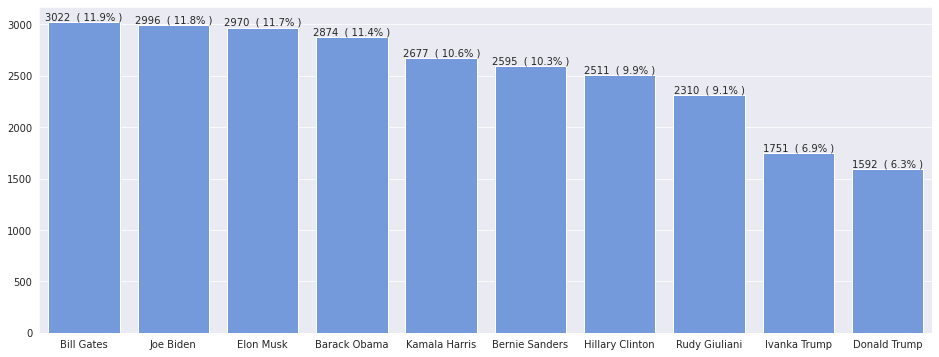

In [8]:
# Overall
x = df.profile_name.value_counts().keys()
y = df.profile_name.value_counts().values

plt.figure(figsize = (16, 6))
_ = sns.barplot(data = df, x = x, y = y, color = 'cornflowerblue')
annotate_perct(ax_plot = _, add_height = 50, total = sum(y), rot= 0)
plt.show()

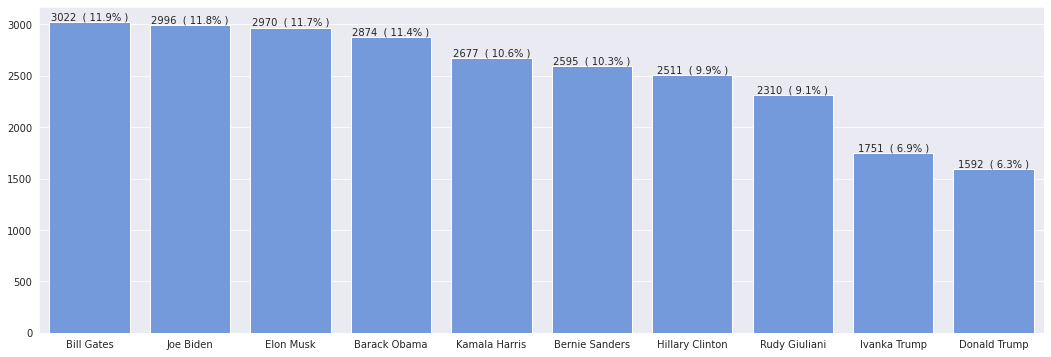

In [9]:
# Overall
x = df.profile_name.value_counts().keys()
y = df.profile_name.value_counts().values

plt.figure(figsize = (18, 6))
_ = sns.barplot(data = df, x = x, y = y, color = 'cornflowerblue')
annotate_perct(ax_plot = _, add_height = 50, total = sum(y), rot= 0)
plt.show()

In [10]:
cols = ['length', 'spaces', 'uppers', 'punctuations', 'questionsmark', 'explainations']

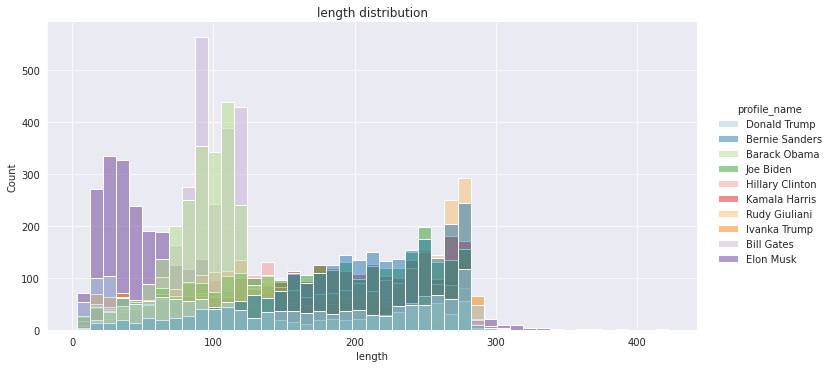

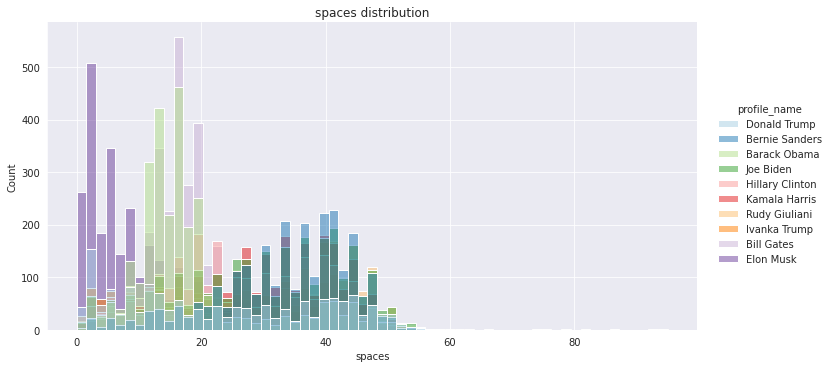

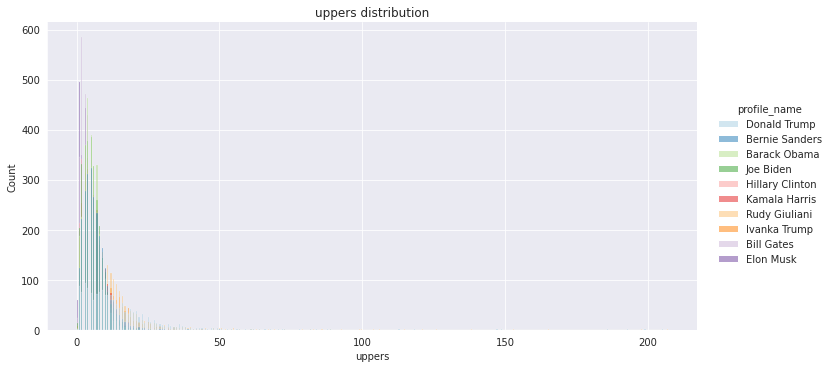

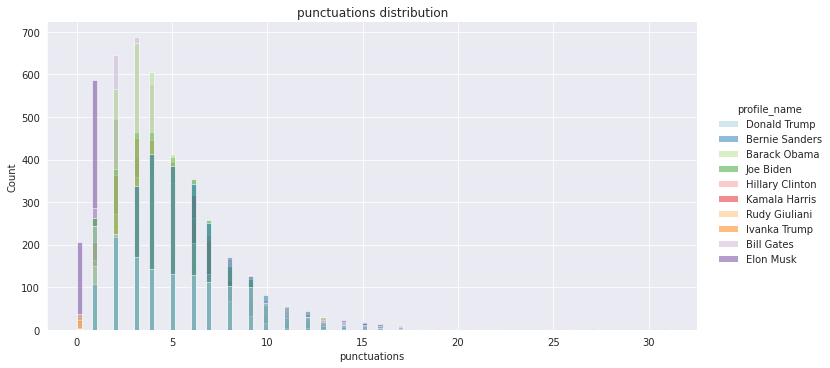

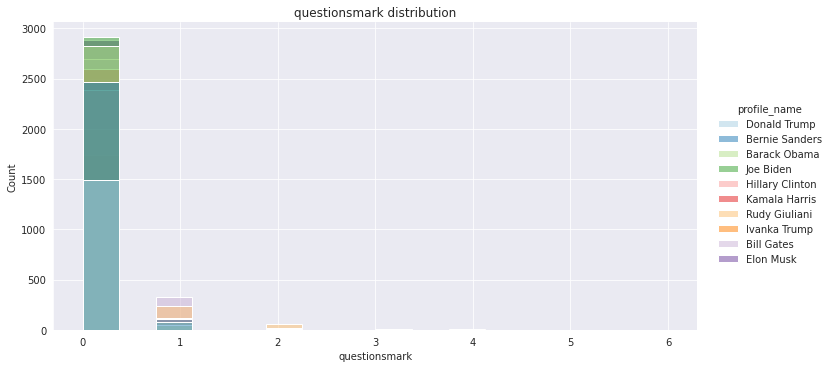

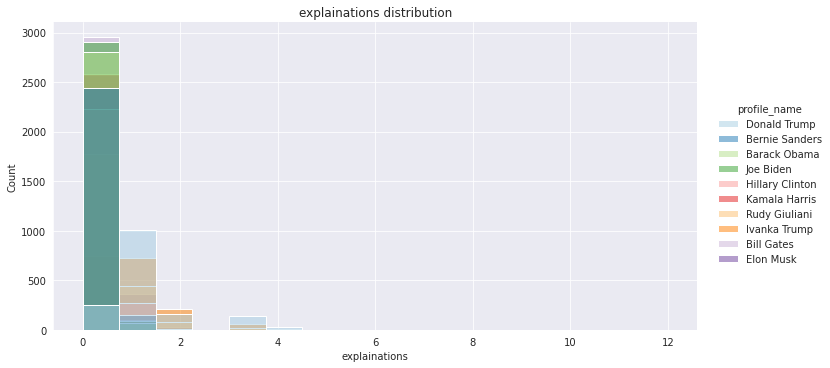

In [11]:
for col in cols:
    sns.displot(df, x = col, hue="profile_name", palette = 'Paired', aspect=12/6)
    plt.title(col + ' distribution')

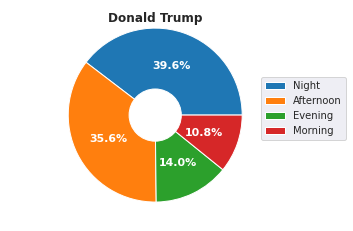

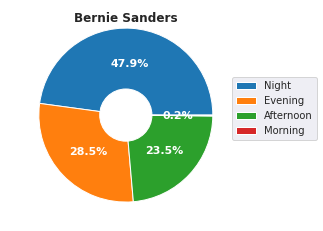

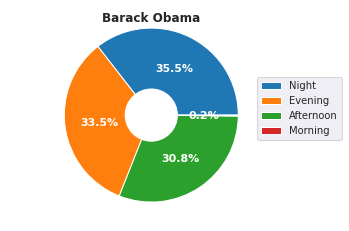

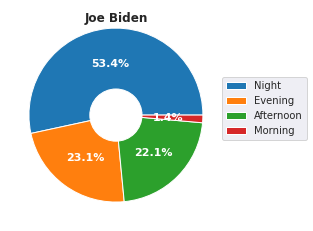

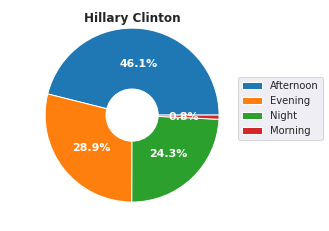

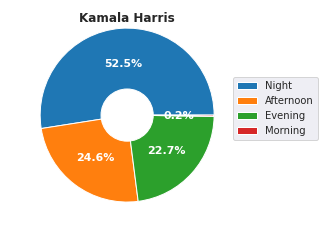

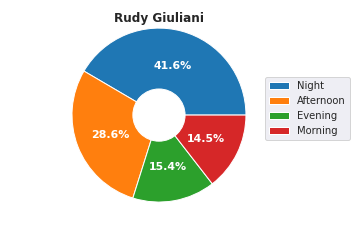

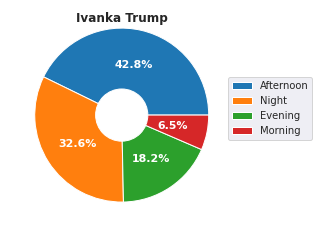

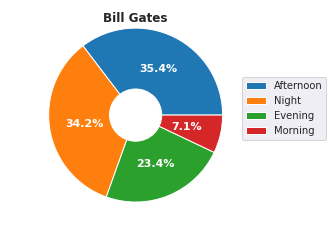

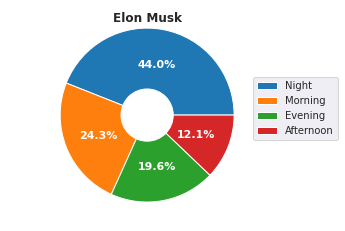

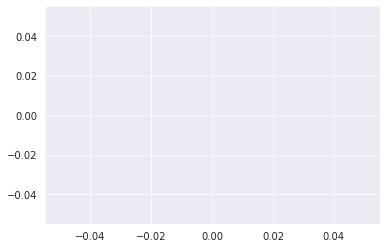

In [12]:
annotation_style = {'fontsize': 11, 'color': 'w', 'weight': 'bold'}

for profile in df.profile_name.unique():
    df.loc[df.profile_name == profile].day_part.value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = annotation_style, label = '')
    plt.gca().add_artist(plt.Circle((0,0), 0.30, fc = 'white'))
    plt.legend(loc=1, bbox_to_anchor=(1.40,0.7))
    plt.title(profile, pad = -15, weight = 'bold')
    plt.show()
    
    plt.plot()

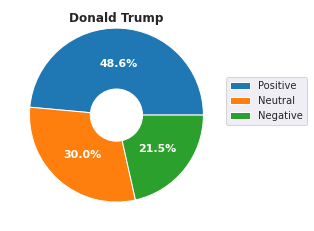

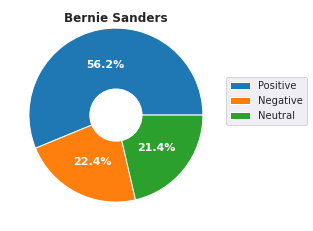

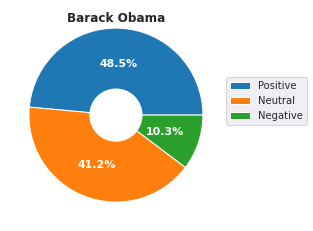

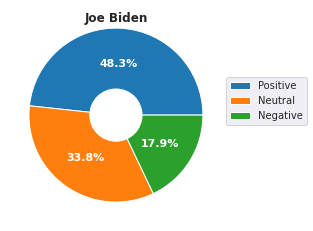

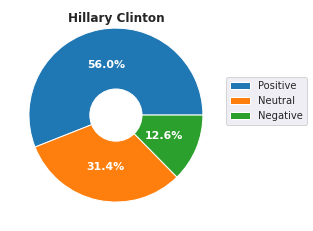

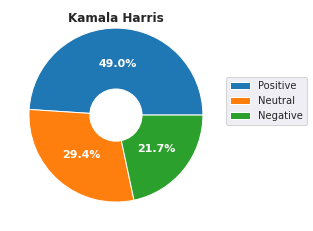

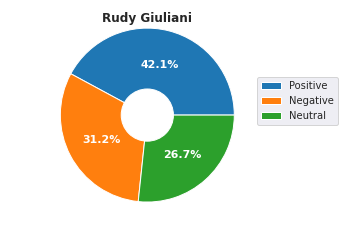

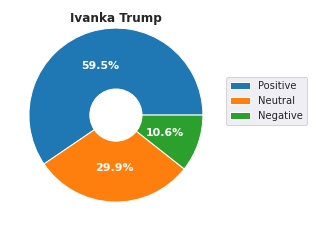

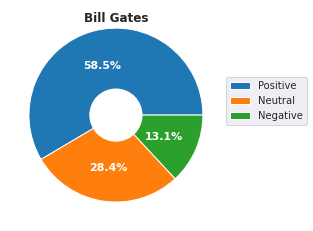

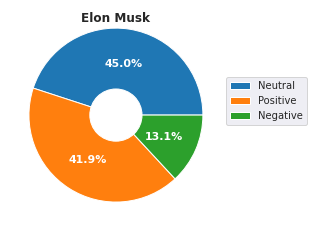

In [13]:
for profile in df.profile_name.unique():
    df.loc[df.profile_name == profile].polarity_class.value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = annotation_style, label = '')
    plt.gca().add_artist(plt.Circle((0,0), 0.30, fc = 'white'))
    plt.legend(loc=1, bbox_to_anchor=(1.40,0.7))
    plt.title(profile, pad = -15, weight = 'bold')
    plt.show()

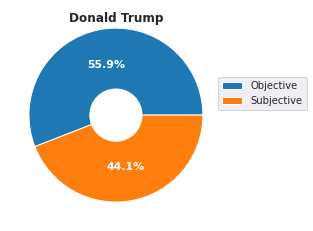

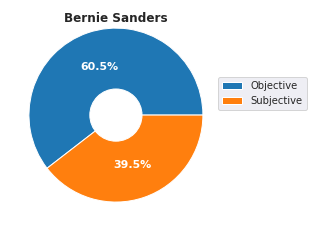

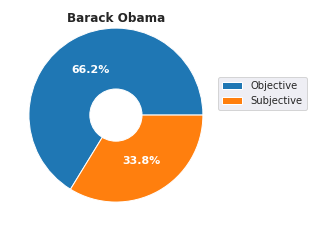

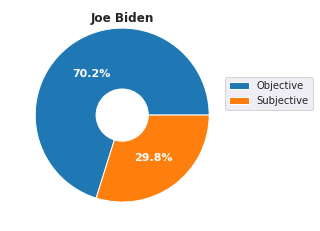

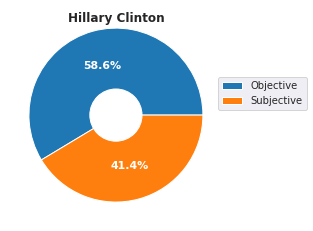

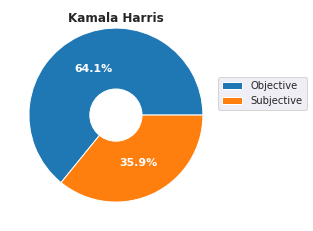

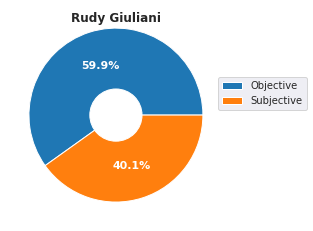

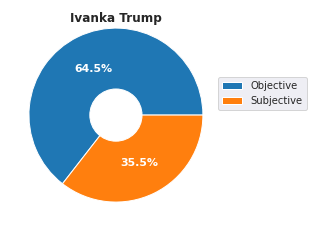

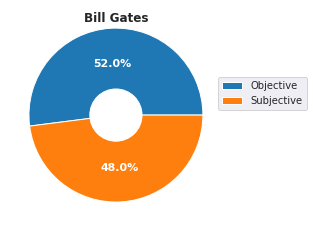

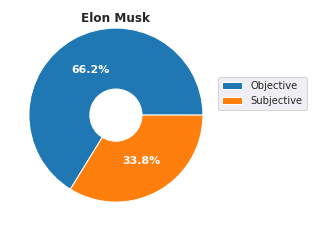

In [14]:
for profile in df.profile_name.unique():
    df.loc[df.profile_name == profile].subjectivity_class.value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = annotation_style, label = '')
    plt.gca().add_artist(plt.Circle((0,0), 0.30, fc = 'white'))
    plt.legend(loc=1, bbox_to_anchor=(1.40,0.7))
    plt.title(profile, pad = -15, weight = 'bold')
    plt.show()

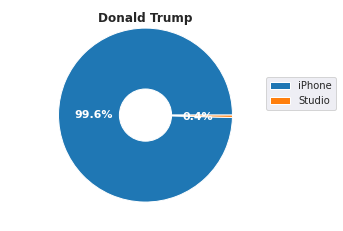

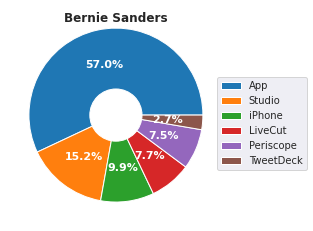

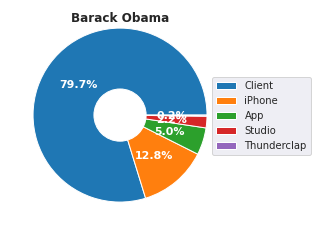

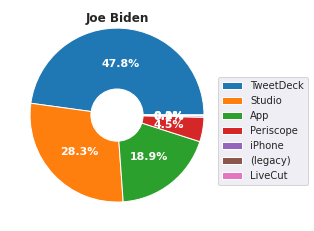

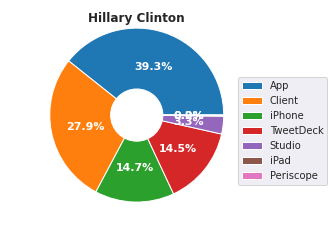

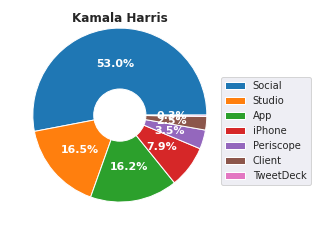

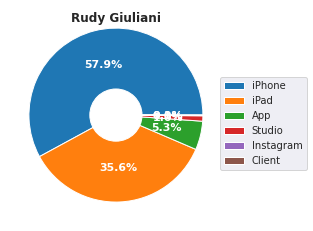

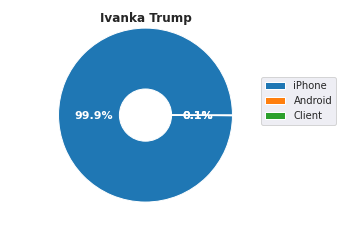

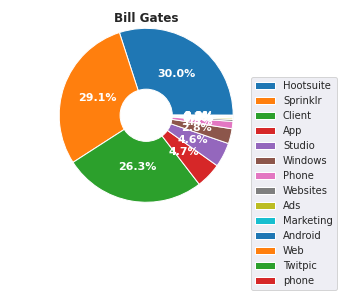

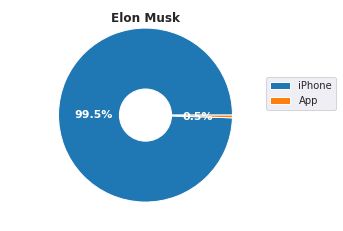

In [15]:
for profile in df.profile_name.unique():
    df.loc[df.profile_name == profile].source_device.value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = annotation_style, label = '')
    plt.gca().add_artist(plt.Circle((0,0), 0.30, fc = 'white'))
    plt.legend(loc=1, bbox_to_anchor=(1.40,0.7))
    plt.title(profile, pad = -15, weight = 'bold')
    plt.show()

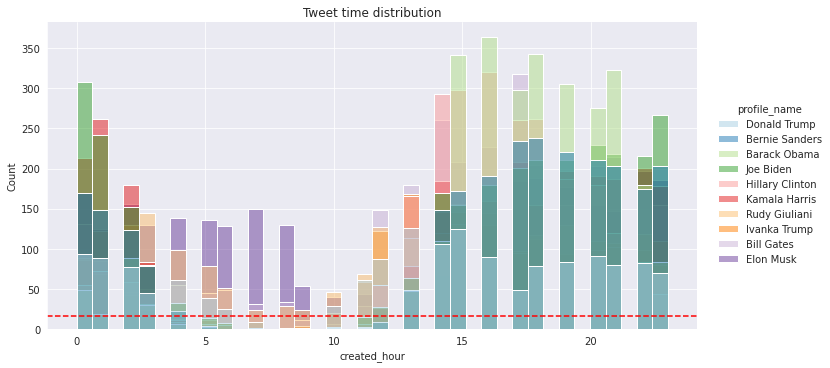

In [16]:
sns.displot(df, x = df.created_hour, hue="profile_name", palette = 'Paired', aspect=12/6 )
plt.axhline(df.created_hour.median(), c = 'r', linestyle = '--')
plt.title('Tweet time distribution');

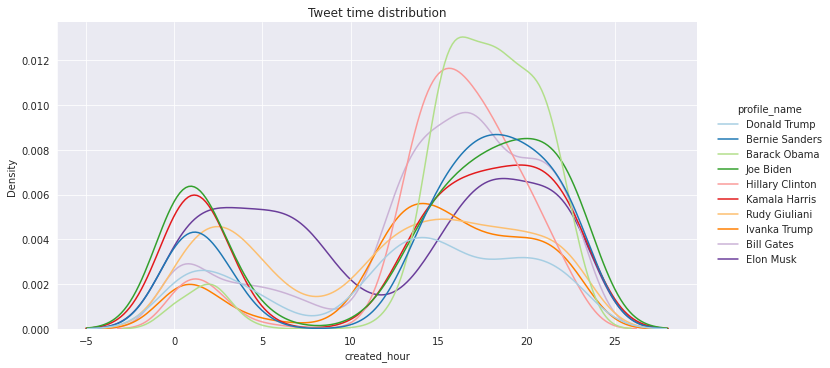

In [17]:
sns.displot(data = df, x = 'created_hour', hue = 'profile_name', kind = 'kde', palette = 'Paired', aspect=12/6,)
plt.title('Tweet time distribution')
plt.show()

## **Building ML Model**

In [18]:
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [19]:
numeric_cols = ['uppers', 'punctuations', 'questionsmark', 'explainations']
text_feature = ['clean_tweet']
targets      = ['profile_name']

In [20]:
df = df[numeric_cols + text_feature + targets].reset_index(drop=True)
df

,uppers,punctuations,questionsmark,explainations,clean_tweet,profile_name
0,1,1,0,1,wow,Donald Trump
1,1,1,0,1,cute,Donald Trump
2,3,2,0,1,david great guy patriot thank lauren,Donald Trump
3,45,3,0,3,greatest election fraud history country,Donald Trump
4,15,5,1,0,congress give people stimulus bill fault fault...,Donald Trump
...,...,...,...,...,...,...
25293,6,2,0,0,@erdayastronaut dome frame sn2 sn1 thrust dome,Elon Musk
25294,2,0,0,0,boca,Elon Musk
25295,1,1,0,0,@neiltyson include hypothesize statement wrong...,Elon Musk
25296,1,1,0,0,@flcnhvy true,Elon Musk


In [21]:
# Encode multiclass target
encoder = LabelEncoder()

X = df[numeric_cols + text_feature] 
y, labels= encoder.fit_transform(df.profile_name), encoder.classes_.tolist()

In [22]:
def process_input_features(X_train, X_test, n_features):
    
    # Scale numeric features
    scaler = MinMaxScaler()
    # Initiate TFIDF Vect
    tfidf_vect = TfidfVectorizer(ngram_range = (1,4), max_features = n_features , stop_words = 'english')
    
    # Training Dataset
    scaled_X_train = scaler.fit_transform(X_train.iloc[:, 0:4])
    scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns[:4])

    # Fit & transform the X_train
    tfidfVect_X_train = tfidf_vect.fit_transform(X_train.iloc[:, 4])
    tfidfVect_X_train = pd.DataFrame(tfidfVect_X_train.toarray(), columns = tfidf_vect.get_feature_names())
    
    X_train = pd.concat([scaled_X_train, tfidfVect_X_train], axis=1)
    
    
    # Testing Dataset
    scaled_X_test = scaler.transform(X_test.iloc[:, 0:4])
    scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns[:4])
    
    tfidfVect_X_test = tfidf_vect.transform(X_test.iloc[:, 4])
    tfidfVect_X_test = pd.DataFrame(tfidfVect_X_test.toarray(), columns = tfidf_vect.get_feature_names())
    
    X_test = pd.concat([scaled_X_test, tfidfVect_X_test], axis=1)
    
    return X_train, X_test, scaler, tfidf_vect    

In [23]:
def evaluate_classifier(model_name, model, Xtrain, Xtest, ytrain, ytest):
    # Initiate the Naive Bayes 'MultinomialNB' classifier
    clf = model

    # Fit classifier with the X_train_tfidf, y_train
    clf.fit(Xtrain, ytrain)

    # Store predicted values ub y_pred
    y_pred = clf.predict(Xtest)
    
    accuracyScore  = accuracy_score(ytest, y_pred)
    recallScore    = recall_score(ytest, y_pred, average = 'weighted')
    precisionScore = precision_score(ytest, y_pred, average = 'weighted')
    f1Score        = f1_score(ytest, y_pred, average = 'weighted')

    model_name_list.append(model_name)
    accuracyScore_list.append(accuracyScore)
    recallScore_list.append(recallScore)
    precisionScore_list.append(precisionScore)
    f1Score_list.append(f1Score)
    
    print(model_name, '\n')
    print('Accuracy Score: {}\n\n'.format(round(accuracyScore * 100),1))

    print('Confusion Matrix:')
    plt.figure(figsize=(12,5))
    sns.heatmap(confusion_matrix(ytest, y_pred), cmap = 'coolwarm', annot = True, fmt=".1f", xticklabels = labels, yticklabels = labels, )
    plt.show()

    print('\n\nClassification Report: \n{}\n'.format(classification_report(ytest, y_pred)))

In [24]:
classifiers_dict = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(solver = 'newton-cg'),
    'RandomForestClassifier': RandomForestClassifier(n_estimators = 300)
}

MultinomialNB 

Accuracy Score: 69


Confusion Matrix:


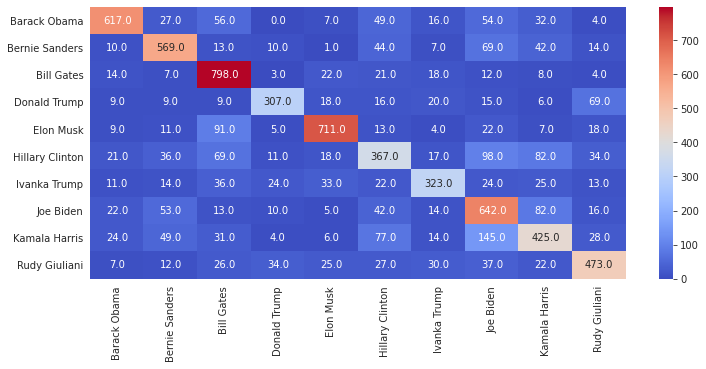



Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       862
           1       0.72      0.73      0.73       779
           2       0.70      0.88      0.78       907
           3       0.75      0.64      0.69       478
           4       0.84      0.80      0.82       891
           5       0.54      0.49      0.51       753
           6       0.70      0.62      0.65       525
           7       0.57      0.71      0.64       899
           8       0.58      0.53      0.55       803
           9       0.70      0.68      0.69       693

    accuracy                           0.69      7590
   macro avg       0.69      0.68      0.68      7590
weighted avg       0.69      0.69      0.69      7590


BernoulliNB 

Accuracy Score: 69


Confusion Matrix:


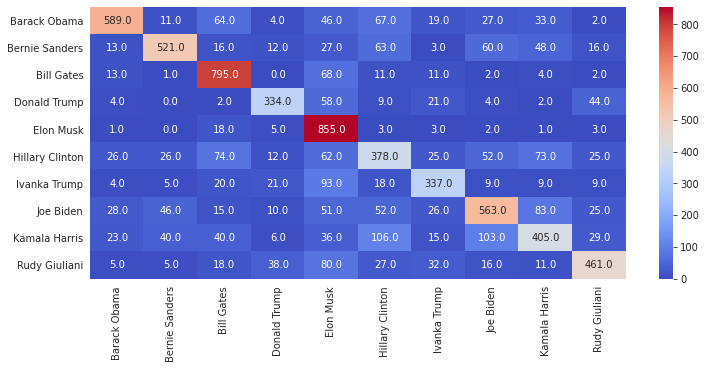



Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       862
           1       0.80      0.67      0.73       779
           2       0.75      0.88      0.81       907
           3       0.76      0.70      0.73       478
           4       0.62      0.96      0.75       891
           5       0.51      0.50      0.51       753
           6       0.68      0.64      0.66       525
           7       0.67      0.63      0.65       899
           8       0.61      0.50      0.55       803
           9       0.75      0.67      0.70       693

    accuracy                           0.69      7590
   macro avg       0.70      0.68      0.68      7590
weighted avg       0.70      0.69      0.69      7590


LogisticRegression 

Accuracy Score: 73


Confusion Matrix:


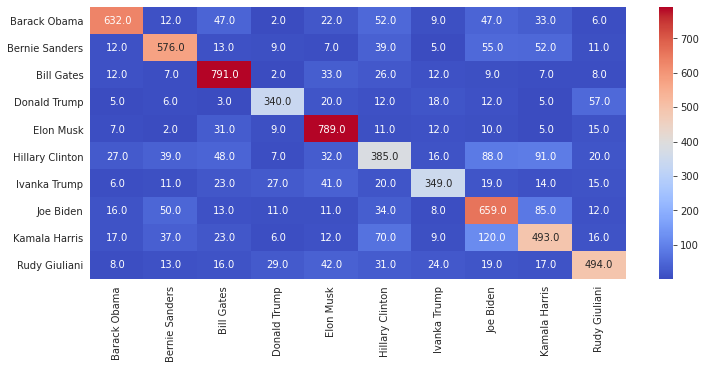



Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       862
           1       0.76      0.74      0.75       779
           2       0.78      0.87      0.83       907
           3       0.77      0.71      0.74       478
           4       0.78      0.89      0.83       891
           5       0.57      0.51      0.54       753
           6       0.76      0.66      0.71       525
           7       0.63      0.73      0.68       899
           8       0.61      0.61      0.61       803
           9       0.76      0.71      0.73       693

    accuracy                           0.73      7590
   macro avg       0.73      0.72      0.72      7590
weighted avg       0.73      0.73      0.72      7590


RandomForestClassifier 

Accuracy Score: 67


Confusion Matrix:


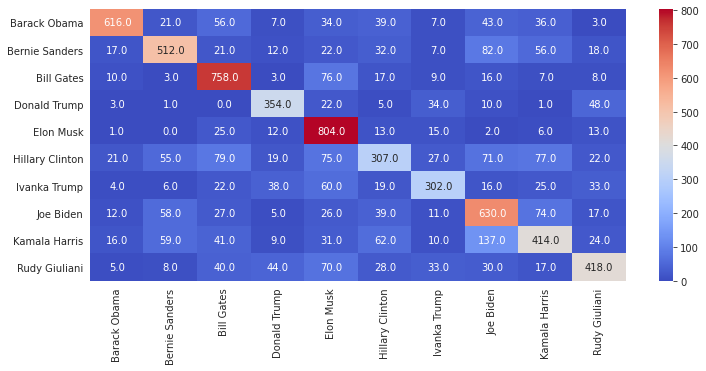



Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.71      0.79       862
           1       0.71      0.66      0.68       779
           2       0.71      0.84      0.77       907
           3       0.70      0.74      0.72       478
           4       0.66      0.90      0.76       891
           5       0.55      0.41      0.47       753
           6       0.66      0.58      0.62       525
           7       0.61      0.70      0.65       899
           8       0.58      0.52      0.55       803
           9       0.69      0.60      0.64       693

    accuracy                           0.67      7590
   macro avg       0.67      0.67      0.66      7590
weighted avg       0.68      0.67      0.67      7590


MultinomialNB 

Accuracy Score: 70


Confusion Matrix:


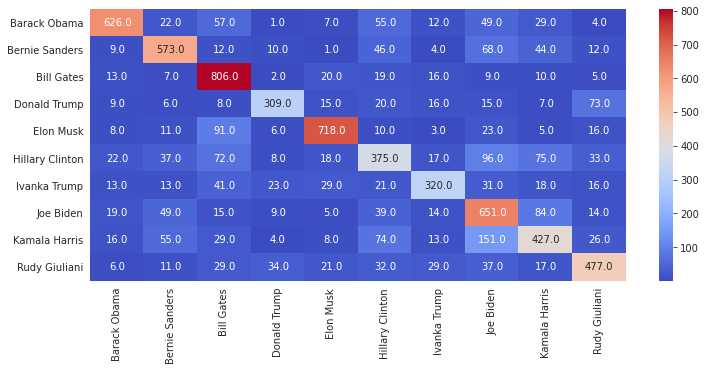



Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       862
           1       0.73      0.74      0.73       779
           2       0.69      0.89      0.78       907
           3       0.76      0.65      0.70       478
           4       0.85      0.81      0.83       891
           5       0.54      0.50      0.52       753
           6       0.72      0.61      0.66       525
           7       0.58      0.72      0.64       899
           8       0.60      0.53      0.56       803
           9       0.71      0.69      0.70       693

    accuracy                           0.70      7590
   macro avg       0.70      0.69      0.69      7590
weighted avg       0.70      0.70      0.69      7590


BernoulliNB 

Accuracy Score: 70


Confusion Matrix:


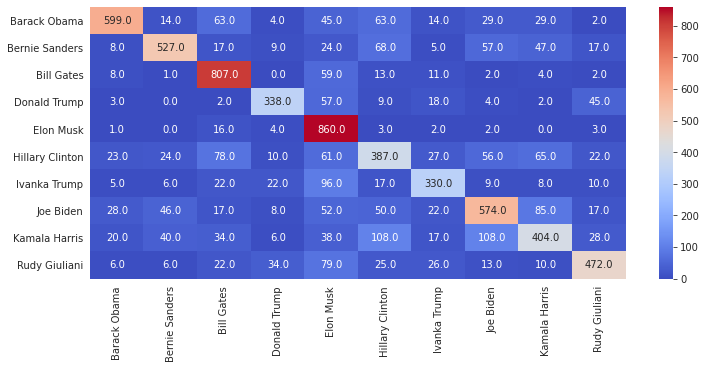



Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.69      0.77       862
           1       0.79      0.68      0.73       779
           2       0.75      0.89      0.81       907
           3       0.78      0.71      0.74       478
           4       0.63      0.97      0.76       891
           5       0.52      0.51      0.52       753
           6       0.70      0.63      0.66       525
           7       0.67      0.64      0.65       899
           8       0.62      0.50      0.55       803
           9       0.76      0.68      0.72       693

    accuracy                           0.70      7590
   macro avg       0.71      0.69      0.69      7590
weighted avg       0.71      0.70      0.69      7590


LogisticRegression 

Accuracy Score: 74


Confusion Matrix:


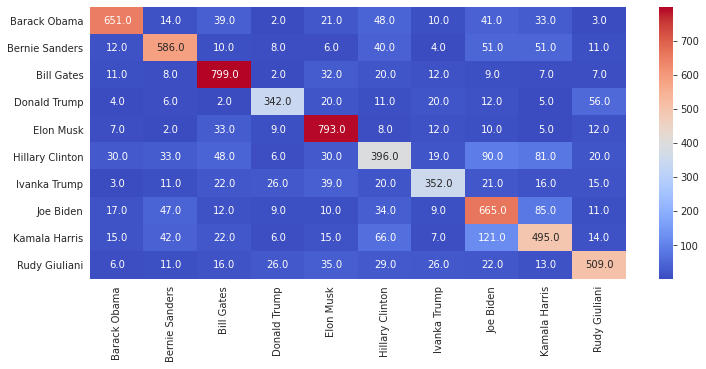



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       862
           1       0.77      0.75      0.76       779
           2       0.80      0.88      0.84       907
           3       0.78      0.72      0.75       478
           4       0.79      0.89      0.84       891
           5       0.59      0.53      0.56       753
           6       0.75      0.67      0.71       525
           7       0.64      0.74      0.69       899
           8       0.63      0.62      0.62       803
           9       0.77      0.73      0.75       693

    accuracy                           0.74      7590
   macro avg       0.74      0.73      0.73      7590
weighted avg       0.74      0.74      0.73      7590


RandomForestClassifier 

Accuracy Score: 68


Confusion Matrix:


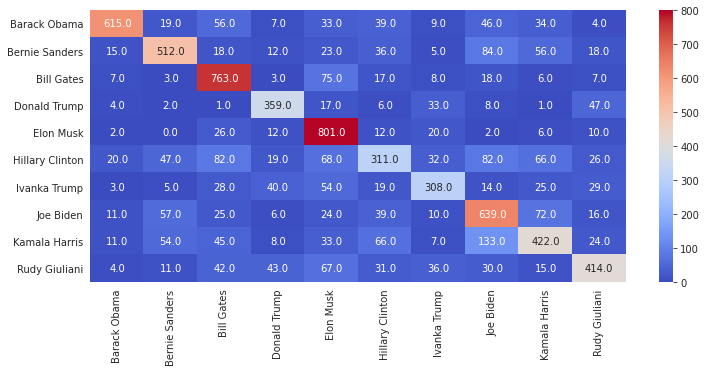



Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       862
           1       0.72      0.66      0.69       779
           2       0.70      0.84      0.77       907
           3       0.71      0.75      0.73       478
           4       0.67      0.90      0.77       891
           5       0.54      0.41      0.47       753
           6       0.66      0.59      0.62       525
           7       0.61      0.71      0.65       899
           8       0.60      0.53      0.56       803
           9       0.70      0.60      0.64       693

    accuracy                           0.68      7590
   macro avg       0.68      0.67      0.67      7590
weighted avg       0.68      0.68      0.67      7590


MultinomialNB 

Accuracy Score: 71


Confusion Matrix:


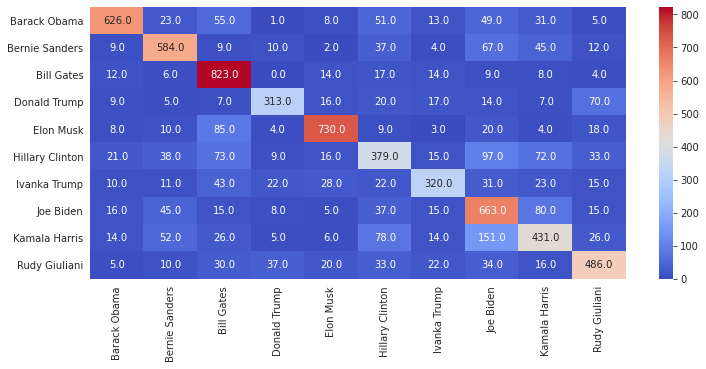



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       862
           1       0.74      0.75      0.75       779
           2       0.71      0.91      0.79       907
           3       0.77      0.65      0.71       478
           4       0.86      0.82      0.84       891
           5       0.55      0.50      0.53       753
           6       0.73      0.61      0.67       525
           7       0.58      0.74      0.65       899
           8       0.60      0.54      0.57       803
           9       0.71      0.70      0.71       693

    accuracy                           0.71      7590
   macro avg       0.71      0.69      0.70      7590
weighted avg       0.71      0.71      0.70      7590


BernoulliNB 

Accuracy Score: 70


Confusion Matrix:


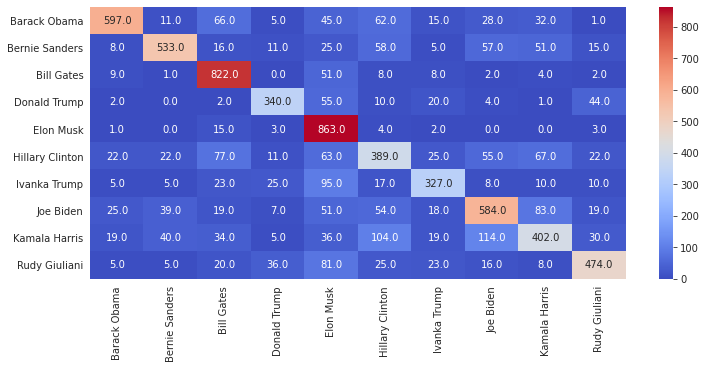



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       862
           1       0.81      0.68      0.74       779
           2       0.75      0.91      0.82       907
           3       0.77      0.71      0.74       478
           4       0.63      0.97      0.77       891
           5       0.53      0.52      0.52       753
           6       0.71      0.62      0.66       525
           7       0.67      0.65      0.66       899
           8       0.61      0.50      0.55       803
           9       0.76      0.68      0.72       693

    accuracy                           0.70      7590
   macro avg       0.71      0.69      0.70      7590
weighted avg       0.71      0.70      0.70      7590


LogisticRegression 

Accuracy Score: 74


Confusion Matrix:


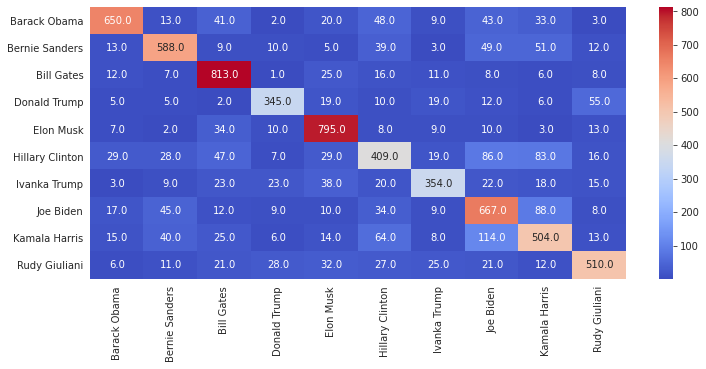



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       862
           1       0.79      0.75      0.77       779
           2       0.79      0.90      0.84       907
           3       0.78      0.72      0.75       478
           4       0.81      0.89      0.85       891
           5       0.61      0.54      0.57       753
           6       0.76      0.67      0.71       525
           7       0.65      0.74      0.69       899
           8       0.63      0.63      0.63       803
           9       0.78      0.74      0.76       693

    accuracy                           0.74      7590
   macro avg       0.74      0.73      0.74      7590
weighted avg       0.74      0.74      0.74      7590


RandomForestClassifier 

Accuracy Score: 68


Confusion Matrix:


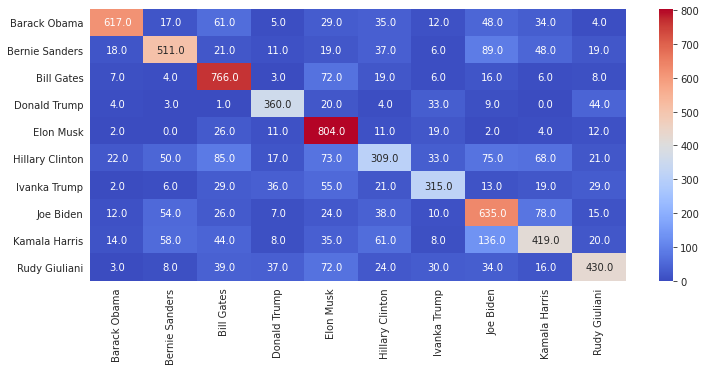



Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       862
           1       0.72      0.66      0.69       779
           2       0.70      0.84      0.76       907
           3       0.73      0.75      0.74       478
           4       0.67      0.90      0.77       891
           5       0.55      0.41      0.47       753
           6       0.67      0.60      0.63       525
           7       0.60      0.71      0.65       899
           8       0.61      0.52      0.56       803
           9       0.71      0.62      0.66       693

    accuracy                           0.68      7590
   macro avg       0.68      0.67      0.67      7590
weighted avg       0.68      0.68      0.68      7590


MultinomialNB 

Accuracy Score: 72


Confusion Matrix:


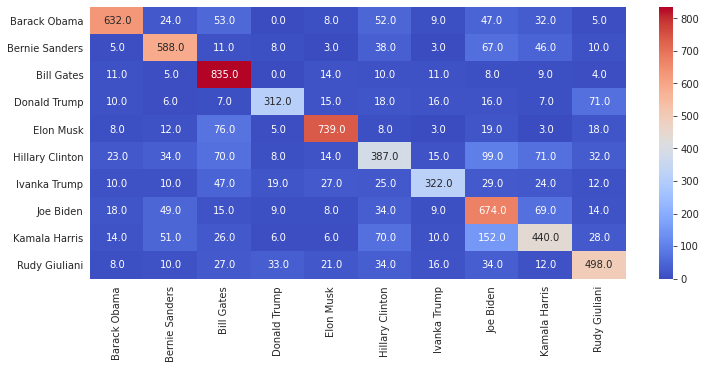



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       862
           1       0.75      0.75      0.75       779
           2       0.72      0.92      0.81       907
           3       0.78      0.65      0.71       478
           4       0.86      0.83      0.85       891
           5       0.57      0.51      0.54       753
           6       0.78      0.61      0.69       525
           7       0.59      0.75      0.66       899
           8       0.62      0.55      0.58       803
           9       0.72      0.72      0.72       693

    accuracy                           0.72      7590
   macro avg       0.72      0.70      0.71      7590
weighted avg       0.72      0.72      0.71      7590


BernoulliNB 

Accuracy Score: 71


Confusion Matrix:


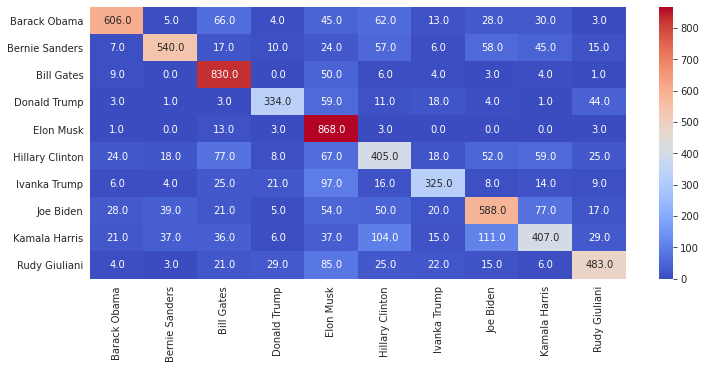



Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       862
           1       0.83      0.69      0.76       779
           2       0.75      0.92      0.82       907
           3       0.80      0.70      0.74       478
           4       0.63      0.97      0.76       891
           5       0.55      0.54      0.54       753
           6       0.74      0.62      0.67       525
           7       0.68      0.65      0.67       899
           8       0.63      0.51      0.56       803
           9       0.77      0.70      0.73       693

    accuracy                           0.71      7590
   macro avg       0.72      0.70      0.70      7590
weighted avg       0.72      0.71      0.71      7590


LogisticRegression 

Accuracy Score: 75


Confusion Matrix:


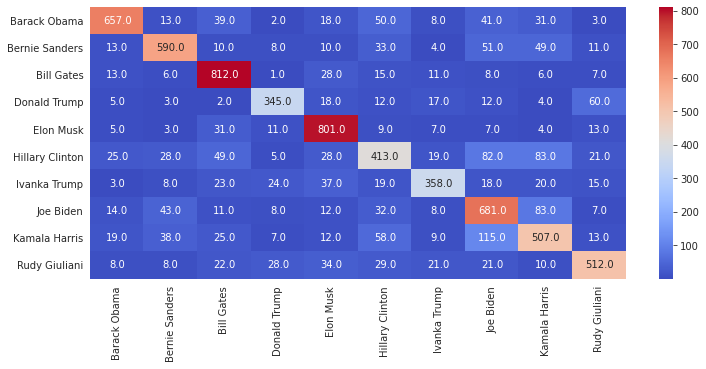



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       862
           1       0.80      0.76      0.78       779
           2       0.79      0.90      0.84       907
           3       0.79      0.72      0.75       478
           4       0.80      0.90      0.85       891
           5       0.62      0.55      0.58       753
           6       0.77      0.68      0.73       525
           7       0.66      0.76      0.70       899
           8       0.64      0.63      0.63       803
           9       0.77      0.74      0.76       693

    accuracy                           0.75      7590
   macro avg       0.75      0.74      0.74      7590
weighted avg       0.75      0.75      0.75      7590


RandomForestClassifier 

Accuracy Score: 69


Confusion Matrix:


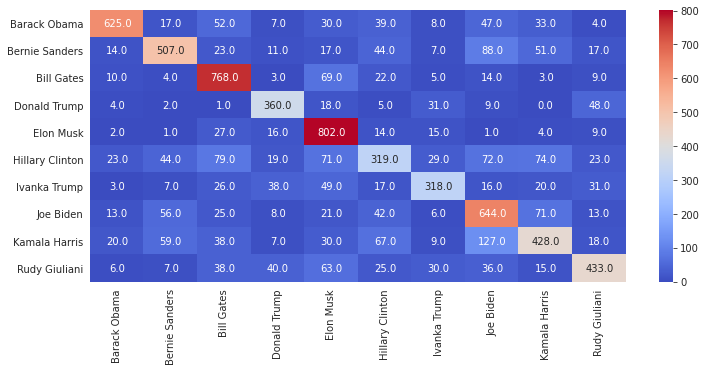



Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       862
           1       0.72      0.65      0.68       779
           2       0.71      0.85      0.77       907
           3       0.71      0.75      0.73       478
           4       0.69      0.90      0.78       891
           5       0.54      0.42      0.47       753
           6       0.69      0.61      0.65       525
           7       0.61      0.72      0.66       899
           8       0.61      0.53      0.57       803
           9       0.72      0.62      0.67       693

    accuracy                           0.69      7590
   macro avg       0.69      0.68      0.68      7590
weighted avg       0.69      0.69      0.68      7590


MultinomialNB 

Accuracy Score: 72


Confusion Matrix:


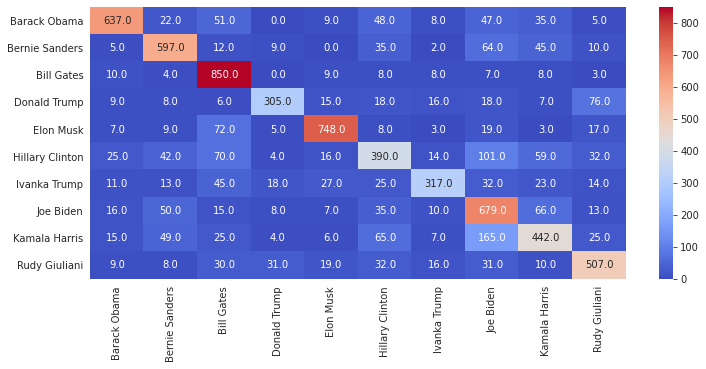



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       862
           1       0.74      0.77      0.76       779
           2       0.72      0.94      0.82       907
           3       0.79      0.64      0.71       478
           4       0.87      0.84      0.86       891
           5       0.59      0.52      0.55       753
           6       0.79      0.60      0.68       525
           7       0.58      0.76      0.66       899
           8       0.63      0.55      0.59       803
           9       0.72      0.73      0.73       693

    accuracy                           0.72      7590
   macro avg       0.73      0.71      0.71      7590
weighted avg       0.73      0.72      0.72      7590


BernoulliNB 

Accuracy Score: 71


Confusion Matrix:


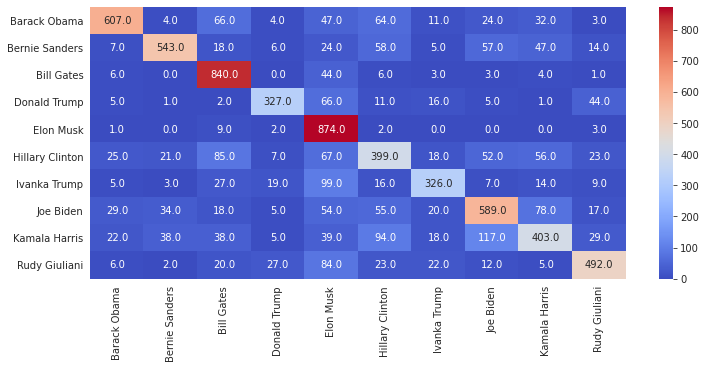



Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       862
           1       0.84      0.70      0.76       779
           2       0.75      0.93      0.83       907
           3       0.81      0.68      0.74       478
           4       0.63      0.98      0.76       891
           5       0.55      0.53      0.54       753
           6       0.74      0.62      0.68       525
           7       0.68      0.66      0.67       899
           8       0.63      0.50      0.56       803
           9       0.77      0.71      0.74       693

    accuracy                           0.71      7590
   macro avg       0.73      0.70      0.70      7590
weighted avg       0.72      0.71      0.71      7590


LogisticRegression 

Accuracy Score: 75


Confusion Matrix:


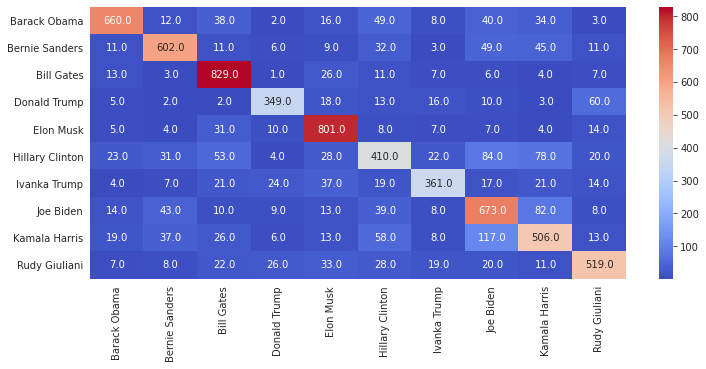



Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       862
           1       0.80      0.77      0.79       779
           2       0.79      0.91      0.85       907
           3       0.80      0.73      0.76       478
           4       0.81      0.90      0.85       891
           5       0.61      0.54      0.58       753
           6       0.79      0.69      0.73       525
           7       0.66      0.75      0.70       899
           8       0.64      0.63      0.64       803
           9       0.78      0.75      0.76       693

    accuracy                           0.75      7590
   macro avg       0.75      0.74      0.75      7590
weighted avg       0.75      0.75      0.75      7590


RandomForestClassifier 

Accuracy Score: 69


Confusion Matrix:


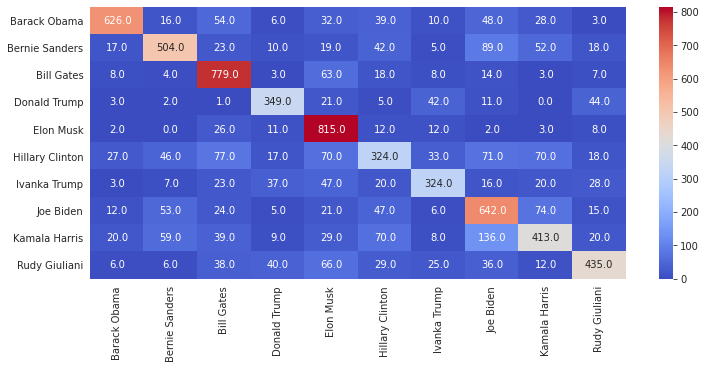



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       862
           1       0.72      0.65      0.68       779
           2       0.72      0.86      0.78       907
           3       0.72      0.73      0.72       478
           4       0.69      0.91      0.79       891
           5       0.53      0.43      0.48       753
           6       0.68      0.62      0.65       525
           7       0.60      0.71      0.65       899
           8       0.61      0.51      0.56       803
           9       0.73      0.63      0.67       693

    accuracy                           0.69      7590
   macro avg       0.69      0.68      0.68      7590
weighted avg       0.69      0.69      0.68      7590


MultinomialNB 

Accuracy Score: 72


Confusion Matrix:


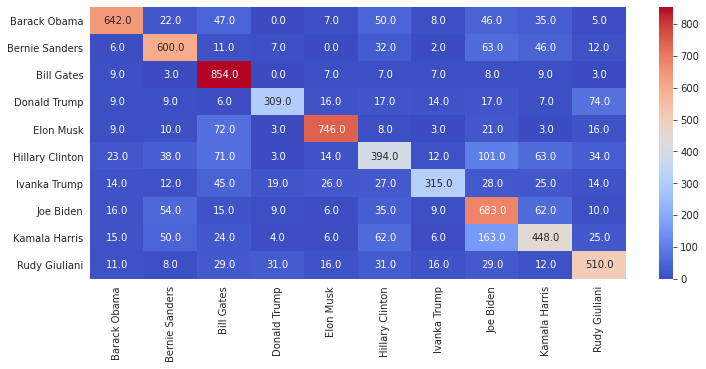



Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       862
           1       0.74      0.77      0.76       779
           2       0.73      0.94      0.82       907
           3       0.80      0.65      0.72       478
           4       0.88      0.84      0.86       891
           5       0.59      0.52      0.56       753
           6       0.80      0.60      0.69       525
           7       0.59      0.76      0.66       899
           8       0.63      0.56      0.59       803
           9       0.73      0.74      0.73       693

    accuracy                           0.72      7590
   macro avg       0.74      0.71      0.72      7590
weighted avg       0.73      0.72      0.72      7590


BernoulliNB 

Accuracy Score: 71


Confusion Matrix:


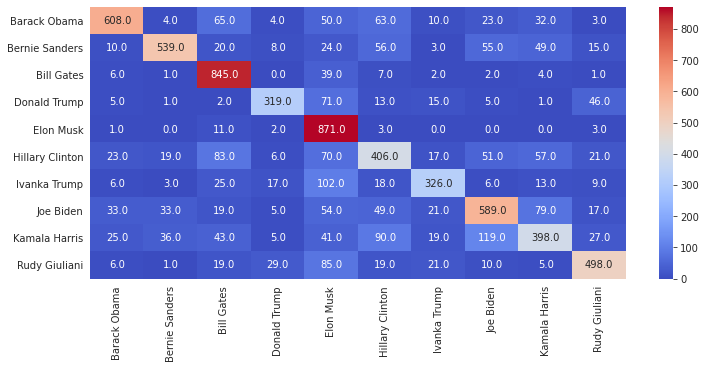



Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       862
           1       0.85      0.69      0.76       779
           2       0.75      0.93      0.83       907
           3       0.81      0.67      0.73       478
           4       0.62      0.98      0.76       891
           5       0.56      0.54      0.55       753
           6       0.75      0.62      0.68       525
           7       0.68      0.66      0.67       899
           8       0.62      0.50      0.55       803
           9       0.78      0.72      0.75       693

    accuracy                           0.71      7590
   macro avg       0.73      0.70      0.70      7590
weighted avg       0.72      0.71      0.71      7590


LogisticRegression 

Accuracy Score: 76


Confusion Matrix:


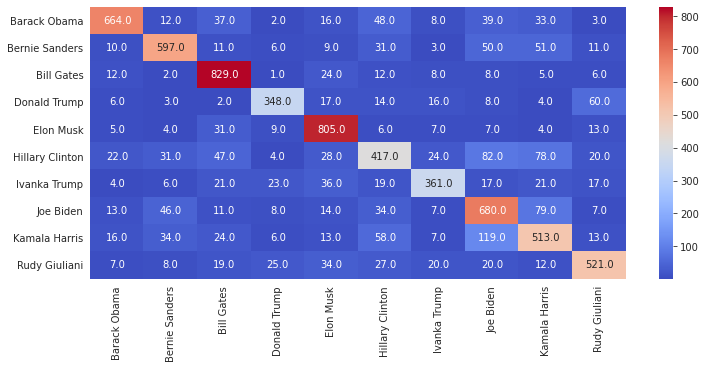



Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       862
           1       0.80      0.77      0.78       779
           2       0.80      0.91      0.86       907
           3       0.81      0.73      0.76       478
           4       0.81      0.90      0.85       891
           5       0.63      0.55      0.59       753
           6       0.78      0.69      0.73       525
           7       0.66      0.76      0.71       899
           8       0.64      0.64      0.64       803
           9       0.78      0.75      0.76       693

    accuracy                           0.76      7590
   macro avg       0.76      0.75      0.75      7590
weighted avg       0.76      0.76      0.75      7590


RandomForestClassifier 

Accuracy Score: 69


Confusion Matrix:


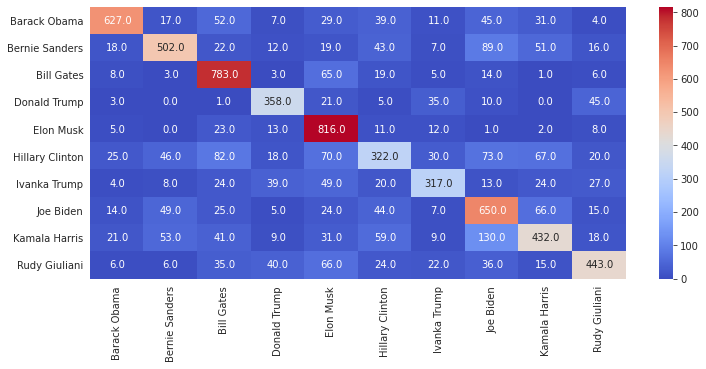



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       862
           1       0.73      0.64      0.69       779
           2       0.72      0.86      0.78       907
           3       0.71      0.75      0.73       478
           4       0.69      0.92      0.78       891
           5       0.55      0.43      0.48       753
           6       0.70      0.60      0.65       525
           7       0.61      0.72      0.66       899
           8       0.63      0.54      0.58       803
           9       0.74      0.64      0.68       693

    accuracy                           0.69      7590
   macro avg       0.69      0.68      0.68      7590
weighted avg       0.69      0.69      0.69      7590


MultinomialNB 

Accuracy Score: 73


Confusion Matrix:


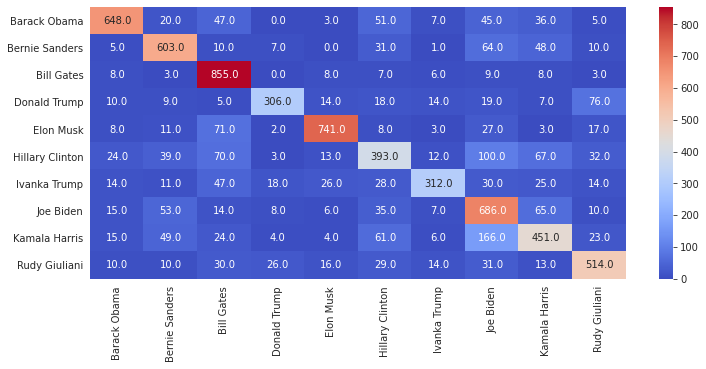



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       862
           1       0.75      0.77      0.76       779
           2       0.73      0.94      0.82       907
           3       0.82      0.64      0.72       478
           4       0.89      0.83      0.86       891
           5       0.59      0.52      0.56       753
           6       0.82      0.59      0.69       525
           7       0.58      0.76      0.66       899
           8       0.62      0.56      0.59       803
           9       0.73      0.74      0.74       693

    accuracy                           0.73      7590
   macro avg       0.74      0.71      0.72      7590
weighted avg       0.73      0.73      0.72      7590


BernoulliNB 

Accuracy Score: 71


Confusion Matrix:


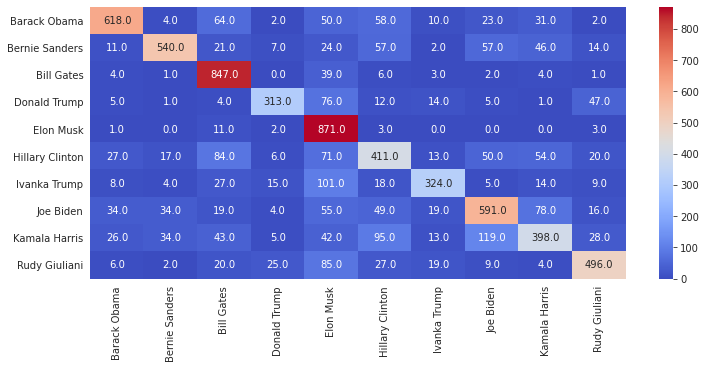



Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       862
           1       0.85      0.69      0.76       779
           2       0.74      0.93      0.83       907
           3       0.83      0.65      0.73       478
           4       0.62      0.98      0.76       891
           5       0.56      0.55      0.55       753
           6       0.78      0.62      0.69       525
           7       0.69      0.66      0.67       899
           8       0.63      0.50      0.56       803
           9       0.78      0.72      0.75       693

    accuracy                           0.71      7590
   macro avg       0.73      0.70      0.71      7590
weighted avg       0.72      0.71      0.71      7590


LogisticRegression 

Accuracy Score: 76


Confusion Matrix:


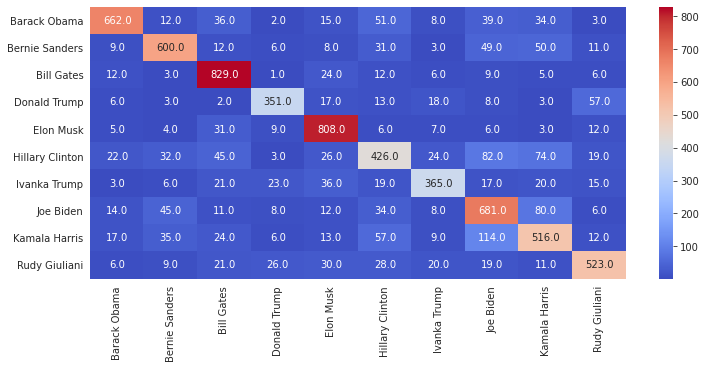



Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       862
           1       0.80      0.77      0.79       779
           2       0.80      0.91      0.86       907
           3       0.81      0.73      0.77       478
           4       0.82      0.91      0.86       891
           5       0.63      0.57      0.60       753
           6       0.78      0.70      0.74       525
           7       0.67      0.76      0.71       899
           8       0.65      0.64      0.65       803
           9       0.79      0.75      0.77       693

    accuracy                           0.76      7590
   macro avg       0.76      0.75      0.75      7590
weighted avg       0.76      0.76      0.76      7590


RandomForestClassifier 

Accuracy Score: 69


Confusion Matrix:


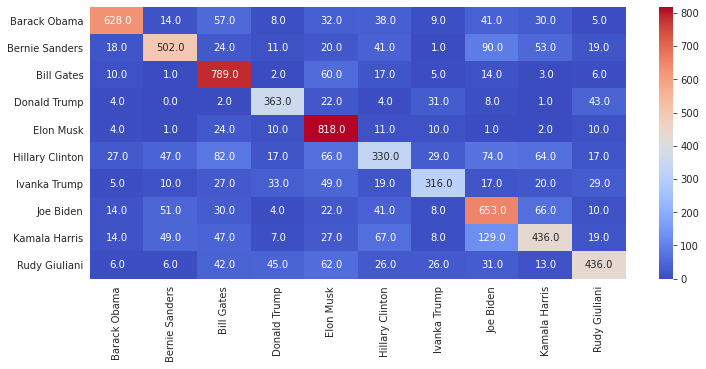



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       862
           1       0.74      0.64      0.69       779
           2       0.70      0.87      0.78       907
           3       0.73      0.76      0.74       478
           4       0.69      0.92      0.79       891
           5       0.56      0.44      0.49       753
           6       0.71      0.60      0.65       525
           7       0.62      0.73      0.67       899
           8       0.63      0.54      0.58       803
           9       0.73      0.63      0.68       693

    accuracy                           0.69      7590
   macro avg       0.70      0.69      0.69      7590
weighted avg       0.70      0.69      0.69      7590




In [25]:
# Initiate lists 
model_name_list = []
n_features_list = []
accuracyScore_list = []
recallScore_list = []
precisionScore_list = []
f1Score_list = []

for num in [2000, 2500, 3000, 4000, 5000, 6000, 7000]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
    X_train, X_test, scaler, tfidf_vect = process_input_features(X_train = X_train, X_test = X_test, n_features = num)    
    for model_name, model in classifiers_dict.items():
        n_features_list.append(num)
        evaluate_classifier( 
            model_name  = model_name, 
            model  = model, 
            Xtrain = X_train.values, 
            Xtest  = X_test.values, 
            ytrain = y_train, 
            ytest  = y_test
        )
    

In [26]:
# Assemble scores from lists to dataframe
results_dict = { 'Model': model_name_list,
                 'N_Features': n_features_list,
                 'Accuracy_Score': accuracyScore_list,
                 'Recall_Score': recallScore_list,
                 'Precision_Score': precisionScore_list,
                 'F1_Score': f1Score_list }

results_df = pd.DataFrame(results_dict).sort_values(by = 'F1_Score', ascending = False)
results_df.Model = results_df.Model + '-' + results_df.N_Features.astype(str)
results_df

,Model,N_Features,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
26,LogisticRegression-7000,7000,0.759025,0.759025,0.760026,0.757560
22,LogisticRegression-6000,6000,0.755599,0.755599,0.756643,0.753999
18,LogisticRegression-5000,5000,0.752306,0.752306,0.752938,0.750525
14,LogisticRegression-4000,4000,0.747826,0.747826,0.748752,0.746251
10,LogisticRegression-3000,3000,0.742424,0.742424,0.743464,0.741004
6,LogisticRegression-2500,2500,0.736232,0.736232,0.737110,0.734763
2,LogisticRegression-2000,2000,0.725692,0.725692,0.726879,0.724223
24,MultinomialNB-7000,7000,0.725823,0.725823,0.734293,0.724154
20,MultinomialNB-6000,6000,0.724769,0.724769,0.731672,0.722786
16,MultinomialNB-5000,5000,0.720949,0.720949,0.727652,0.718874


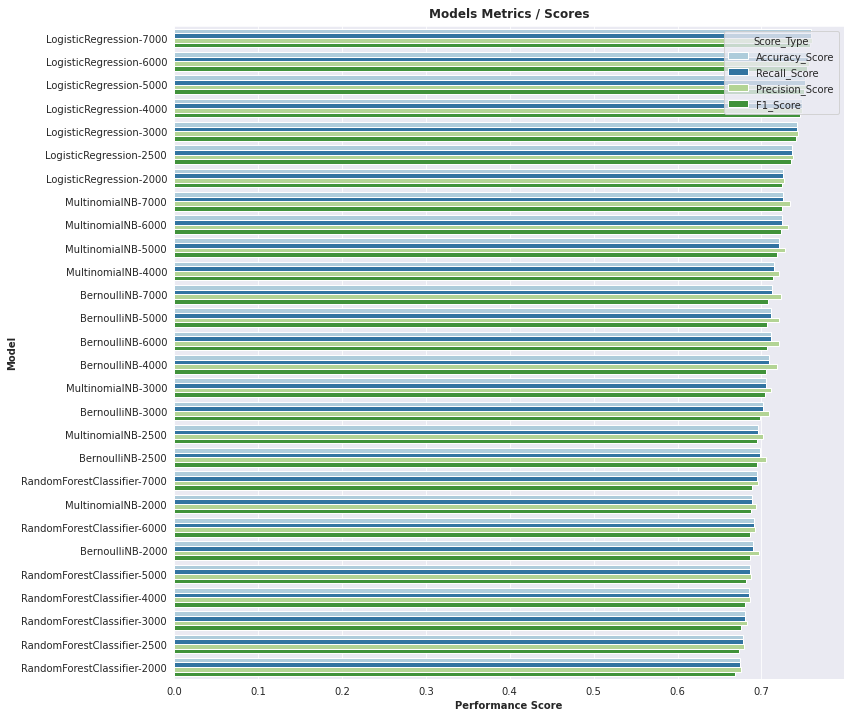

In [27]:
# Change the shape of the dataframe using pd.melt
results_melted_df = pd.melt(frame = results_df, 
                            id_vars = ['Model'], 
                            value_vars = ['Accuracy_Score', 'Recall_Score', 'Precision_Score', 'F1_Score'], 
                            var_name = 'Score_Type', value_name = 'Score')

# Plot scores againt models
plt.figure(figsize= (12,12))

_ = sns.barplot( data = results_melted_df, x = 'Score', y = 'Model', hue = 'Score_Type', palette= "Paired")

_.set_title('Models Metrics / Scores', pad = 10, weight= 'bold')
_.set_xlabel('Performance Score', weight= 'bold')
_.set_ylabel('Model', weight= 'bold')

plt.show()

### **Tune Model**

In [30]:
logreg = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 300, 800],
    'solver': ['newton-cg', 'lbfgs', 'sag']
}

scoring_evaluation = ['accuracy', 'f1_weighted']

model = RandomizedSearchCV(
    estimator = logreg, 
    param_distributions = param_grid, 
    cv = 4, 
    scoring = scoring_evaluation, 
    refit = False, 
    return_train_score = True,
    n_iter = 5,
    n_jobs = -1,
    verbose = 1
)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
X_train, X_test, scaler, tfidf_vect = process_input_features(X_train = X_train, X_test = X_test, n_features = 6000)    

In [31]:
summary = model.fit(X_train.values, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [32]:
summary_df = pd.DataFrame(summary.cv_results_)
summary_df.sort_values(by = 'mean_test_f1_weighted', ascending=False, inplace=True)
summary_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_max_iter,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_train_f1_weighted,split1_train_f1_weighted,split2_train_f1_weighted,split3_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,660.440376,20.254546,0.408061,0.418866,sag,l2,300,10,"{'solver': 'sag', 'penalty': 'l2', 'max_iter':...",0.740682,0.743393,0.744296,0.744748,0.743280,0.001577,1,0.973119,0.975077,0.973270,0.973195,0.973665,0.000817,0.739736,0.743623,0.743492,0.744119,0.742742,0.001752,1,0.973094,0.975059,0.973258,0.973198,0.973652,0.000814
4,347.738607,19.298026,0.112215,0.042047,newton-cg,l2,800,10,"{'solver': 'newton-cg', 'penalty': 'l2', 'max_...",0.740682,0.743393,0.744296,0.744522,0.743223,0.001527,2,0.973119,0.975077,0.973270,0.973195,0.973665,0.000817,0.739708,0.743606,0.743492,0.743888,0.742674,0.001718,2,0.973094,0.975059,0.973258,0.973198,0.973652,0.000814
3,230.627261,10.372754,0.174382,0.006639,newton-cg,l2,100,1,"{'solver': 'newton-cg', 'penalty': 'l2', 'max_...",0.728258,0.740230,0.745652,0.739553,0.738423,0.006327,3,0.865447,0.862887,0.864694,0.864769,0.864449,0.000949,0.725258,0.739110,0.743993,0.737642,0.736501,0.006904,3,0.864850,0.862090,0.864099,0.864100,0.863785,0.001025
1,144.348525,11.053487,0.173827,0.014115,lbfgs,l2,100,1,"{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter...",0.727807,0.740230,0.745426,0.739779,0.738310,0.006458,4,0.865447,0.863037,0.864543,0.864769,0.864449,0.000880,0.724766,0.739110,0.743782,0.737851,0.736377,0.007058,4,0.864842,0.862238,0.863965,0.864099,0.863786,0.000954
2,67.010703,2.431901,0.167673,0.002895,lbfgs,l2,100,0.1,"{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter...",0.653038,0.660267,0.651909,0.662525,0.656935,0.004550,5,0.711919,0.709133,0.708907,0.709133,0.709773,0.001242,0.644607,0.652826,0.643781,0.653678,0.648723,0.004548,5,0.705783,0.702937,0.702949,0.703302,0.703743,0.001187


In [34]:
summary_df.iloc[0]

mean_fit_time                                                          660.44
std_fit_time                                                          20.2545
mean_score_time                                                      0.408061
std_score_time                                                       0.418866
param_solver                                                              sag
param_penalty                                                              l2
param_max_iter                                                            300
param_C                                                                    10
params                      {'solver': 'sag', 'penalty': 'l2', 'max_iter':...
split0_test_accuracy                                                 0.740682
split1_test_accuracy                                                 0.743393
split2_test_accuracy                                                 0.744296
split3_test_accuracy                                            

### **Train best model on entire dataset**

In [35]:
model = LogisticRegression(penalty='l2', solver='sag', max_iter=700, C=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
X_train, X_test, scaler, tfidf_vect = process_input_features(X_train = X_train, X_test = X_test, n_features = 10000)    

In [36]:
model.fit(X_train, y_train)

# Store predicted values ub y_pred
y_pred = model.predict(X_test)

In [37]:
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))

0.7679841897233202
0.7679841897233202
0.7685038175432231
0.7675576492971081


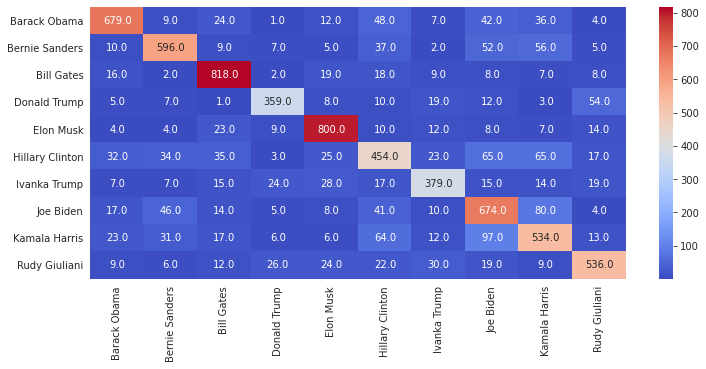

In [38]:
plt.figure(figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'coolwarm', annot = True, fmt=".1f", xticklabels = labels, yticklabels = labels, )
plt.show()

### **Test model on unseen tweets from different profiles**

In [48]:
tweet_dict = dict(
    dt = 'Going now to make a short speech to service members from all over the world. It is a celebration of Christmas. Video Conference - Fake News not invited!',
    bs = 'Congress must pass $2,000 in direct payments and Trump must sign the COVID-relief bill. If not, tens of millions of Americans will lose their unemployment benefits, go hungry and face eviction. This would be a level of governmental cruelty not seen in our lifetimes.',
    bo = 'This Christmas looks different for all of us. As we spend time with those we love—in person or virtually—let us celebrate the blessings we cherish, embrace the spirit of giving, and look out for one another. From my family to yours, Merry Christmas!',
    jb = 'We take holiday traditions very seriously in the Biden family.',
    jb2 = 'I know how hard it is to forego holiday traditions — but it is so very important. Please wear masks, limit the size of any groups, and refrain from traveling. We have to stay apart just a little longer.' ,
    hc = 'Ann was at my side in the White House, the Senate, and on my 2016 campaign. She is smart, compassionate and makes a tremendous impact wherever she goes. I know Governor Newsom will miss her, and I can’t wait to see what she takes on next',
    kh = 'My first grade teacher, Mrs. Frances Wilson, attended my law school graduation. She instilled in me a deep belief in the importance and significance of public education that I carry with me to this day.',
    rg = "DISCOVERY: A 68% ERROR rate found in votes PROVES intentional fraud! PA, AZ, GA, MI, and WI should agree to let us audit the Dominion machines. If they didn’t cheat, what are they afraid of? We MUST have an audit!Rudy Giuliani’s analysis HERE: https://youtu.be/UUtmBrgIC9w",
    it = 'My work doubling the #ChildTaxCredit (which provided over $2000 to more than 40 Million American families), Upwards arrow childcare support (largest expansion of federal funds ever) and advancing #PaidFamilyLeave (1st ever national credit) has also been referred to as “pet projects.” ',
    bg = 'Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor.',
    bg2 = "I've known and learned from @RonConway for more than 40 years. I'm glad to see @svangel team up with @bchesky to mentor and support companies working to create more economic empowerment opportunities for people across the world.",
    em = 'To Tesla owners taking delivery in the final days of year, your support is super appreciated!!'
)

In [49]:
def re_remove_url(x):
    return re.sub(r'(http|www.)\S+', '', x).replace('\n', '')

def extract_text_details_to_predict(x):
    uppers = sum([1 for l in x if l.isupper()]) # how many uppercases in each tweet
    punctuations  = sum([1 for l in x if l in string.punctuation]) # how many punctuations in each tweet
    questionsmark = x.count('?') # how many question marks in each tweet
    explainations = x.count('!') # how many explaination marks in each tweet
    return uppers, punctuations, questionsmark, explainations

def cleaning_tweets_to_predict(x):
    try:
        x = str(x)
        tweet = nlp(x)
        tweet = ' '.join([token.lemma_.lower() for token in tweet if not token.is_stop and not token.is_punct and not token.text.isdigit() and len(token.text) > 2])
        return tweet
    except:
        return np.nan

In [80]:
def process_tweets_to_predict(tweet, scaler, vectorizer, model, encoder):
    
    tweet = re_remove_url(tweet)
    uppers, punctuations, questionsmark, explainations = extract_text_details_to_predict(tweet)
    tweet = cleaning_tweets_to_predict(tweet)
    
    scaled_featues_to_predict = scaler.transform([[uppers, punctuations, questionsmark, explainations]])
    vectorized_text_to_predict = tfidf_vect.transform([tweet]).toarray()
    to_predict = scaled_featues_to_predict.tolist()[0] + vectorized_text_to_predict.tolist()[0]
    
    predicted_profile_probability = float(format(round(np.max(model.predict_proba([to_predict])[0]), 3) * 100, '.2f'))
    predicted_profile = model.predict([to_predict])
    predicted_profile = encoder.inverse_transform(predicted_profile)[0]
    
    return predicted_profile, predicted_profile_probability

In [51]:
for profile, tweet in tweet_dict.items():
    predicted_profile, predicted_profile_probability = process_tweets_to_predict(tweet = tweet, scaler = scaler, vectorizer = tfidf_vect, model = model, encoder = encoder)
    print(profile, ' ---> ', predicted_profile, ' - ', predicted_profile_probability)

dt  --->  ['Donald Trump']  -  65.30
bs  --->  ['Bernie Sanders']  -  86.10
bo  --->  ['Ivanka Trump']  -  26.60
jb  --->  ['Rudy Giuliani']  -  81.60
jb2  --->  ['Barack Obama']  -  42.10
hc  --->  ['Kamala Harris']  -  44.10
kh  --->  ['Bernie Sanders']  -  36.40
rg  --->  ['Rudy Giuliani']  -  83.70
it  --->  ['Ivanka Trump']  -  96.30
bg  --->  ['Bill Gates']  -  54.60
bg2  --->  ['Bill Gates']  -  85.60
em  --->  ['Elon Musk']  -  73.10


### **Export models**

In [58]:
joblib.dump(encoder, 'profiles_encoder.sav')
joblib.dump(scaler, 'extra_features_scaler.sav')
joblib.dump(tfidf_vect, 'tfidf_vectorizer.sav')
joblib.dump(model, 'logreg_model.sav')

['logreg_model.sav']

### **FINAL TEST**

In [1]:
import re
import string
import joblib
import numpy as np
import pandas as pd

import spacy
nlp = spacy.load('en_core_web_sm')

In [41]:
print(f'pandas=={pd.__version__}')
print(f'numpy=={np.__version__}')
print(f're=={re.__version__}')
print(f'joblib=={joblib.__version__}')
print(f'spacy=={spacy.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'fastapi=={fastapi.__version__}')
print(f'uvicorn=={uvicorn.__version__}')

pandas==1.1.3
numpy==1.19.2
re==2.2.1
joblib==0.17.0
spacy==2.3.2
scikit-learn==0.23.2
fastapi==0.61.1
uvicorn==0.12.2


In [2]:
e = joblib.load('exported_models/profiles_encoder.sav')
s = joblib.load('exported_models/extra_features_scaler.sav')
t = joblib.load('exported_models/tfidf_vectorizer.sav')
m = joblib.load('exported_models/logreg_model.sav')

/Users/haithamalabadla/opt/anaconda3/envs/fastapi_env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/haithamalabadla/opt/anaconda3/envs/fastapi_env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/haithamalabadla/opt/anaconda3/envs/fastapi_env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/haithamalabadla/opt/anaconda3/envs/fastapi_env/lib/python3.8/site-packages/sklearn/base.py:329: Us

In [3]:
def re_remove_url(x):
    return re.sub(r'(http|www.)\S+', '', x).replace('\n', '')

def extract_text_details_to_predict(x):
    uppers = sum([1 for l in x if l.isupper()]) # how many uppercases in each tweet
    punctuations  = sum([1 for l in x if l in string.punctuation]) # how many punctuations in each tweet
    questionsmark = x.count('?') # how many question marks in each tweet
    explainations = x.count('!') # how many explaination marks in each tweet
    return uppers, punctuations, questionsmark, explainations

def cleaning_tweets_to_predict(x):
    try:
        x = str(x)
        tweet = nlp(x)
        tweet = ' '.join([token.lemma_.lower() for token in tweet if not token.is_stop and not token.is_punct and not token.text.isdigit() and len(token.text) > 2])
        return tweet
    except:
        return np.nan
    
def process_tweets_to_predict(tweet, scaler, vectorizer, model, encoder):
    
    tweet = re_remove_url(tweet)
    uppers, punctuations, questionsmark, explainations = extract_text_details_to_predict(tweet)
    tweet = cleaning_tweets_to_predict(tweet)
    
    scaled_featues_to_predict = scaler.transform([[uppers, punctuations, questionsmark, explainations]])
    vectorized_text_to_predict = vectorizer.transform([tweet]).toarray()
    to_predict = scaled_featues_to_predict.tolist()[0] + vectorized_text_to_predict.tolist()[0]
    
    predicted_profile_probability = float(format(round(np.max(model.predict_proba([to_predict])[0]), 3) * 100, '.2f'))
    predicted_profile = model.predict([to_predict])
    predicted_profile = encoder.inverse_transform(predicted_profile)[0]
    
    return predicted_profile, predicted_profile_probability

In [6]:
tweet_dict = dict(
    dt = 'Going now to make a short speech to service members from all over the world. It is a celebration of Christmas. Video Conference - Fake News not invited!',
    dt2 = 'Time for Republican Senators to step up and fight for the Presidency, like the Democrats would do if they had actually won. The proof is irrefutable! Massive late night mail-in ballot drops in swing states, stuffing the ballot boxes (on video), double voters, dead voters,',
    bs = 'Congress must pass $2,000 in direct payments and Trump must sign the COVID-relief bill. If not, tens of millions of Americans will lose their unemployment benefits, go hungry and face eviction. This would be a level of governmental cruelty not seen in our lifetimes.',
    bo = 'This Christmas looks different for all of us. As we spend time with those we love—in person or virtually—let us celebrate the blessings we cherish, embrace the spirit of giving, and look out for one another. From my family to yours, Merry Christmas!',
    jb = 'We take holiday traditions very seriously in the Biden family.',
    jb2 = 'I know how hard it is to forego holiday traditions — but it is so very important. Please wear masks, limit the size of any groups, and refrain from traveling. We have to stay apart just a little longer.' ,
    hc = 'Ann was at my side in the White House, the Senate, and on my 2016 campaign. She is smart, compassionate and makes a tremendous impact wherever she goes. I know Governor Newsom will miss her, and I can’t wait to see what she takes on next',
    kh = 'My first grade teacher, Mrs. Frances Wilson, attended my law school graduation. She instilled in me a deep belief in the importance and significance of public education that I carry with me to this day.',
    rg = "DISCOVERY: A 68% ERROR rate found in votes PROVES intentional fraud! PA, AZ, GA, MI, and WI should agree to let us audit the Dominion machines. If they didn’t cheat, what are they afraid of? We MUST have an audit!Rudy Giuliani’s analysis HERE: https://youtu.be/UUtmBrgIC9w",
    it = 'My work doubling the #ChildTaxCredit (which provided over $2000 to more than 40 Million American families), Upwards arrow childcare support (largest expansion of federal funds ever) and advancing #PaidFamilyLeave (1st ever national credit) has also been referred to as “pet projects.” ',
    bg = 'Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor.',
    bg2 = "I've known and learned from @RonConway for more than 40 years. I'm glad to see @svangel team up with @bchesky to mentor and support companies working to create more economic empowerment opportunities for people across the world.",
    em = 'To Tesla owners taking delivery in the final days of year, your support is super appreciated!!'
)

In [7]:
for profile, tweet in tweet_dict.items():
    predicted_profile, probability = process_tweets_to_predict(tweet = tweet, scaler = s, vectorizer = t, model = m, encoder = e)
    if probability > 55:
        print(profile, ' ---> ', predicted_profile, ' - ', probability)
    else:
        print(profile, ' - Not sure, but I think -> ', predicted_profile, ' - ', probability)

dt  --->  Donald Trump  -  65.3
dt2  --->  Donald Trump  -  86.1
bs  --->  Bernie Sanders  -  86.1
bo  - Not sure, but I think ->  Ivanka Trump  -  26.6
jb  --->  Rudy Giuliani  -  81.6
jb2  - Not sure, but I think ->  Barack Obama  -  42.1
hc  - Not sure, but I think ->  Kamala Harris  -  44.1
kh  - Not sure, but I think ->  Bernie Sanders  -  36.4
rg  --->  Rudy Giuliani  -  83.7
it  --->  Ivanka Trump  -  96.3
bg  - Not sure, but I think ->  Bill Gates  -  54.6
bg2  --->  Bill Gates  -  85.6
em  --->  Elon Musk  -  73.1


### **Notes**

Purpose of this excercise is not to get the perfect result, however, it is to show case the process of building model, exporting it and use it in real world application by deploying it and serve it via API to public. The accuracy of this model is 74.4% and the F1 score is 74.3%.

**Steps to enhance model**

- Manually remove common words.
- Use different methods / techniques to deal with unbalanced data
- Use more samples
- Shuffle the dataset before spliting it.
- Use default of increase the max_features parameter in the TF-IDF. Current value is 7000.
- Use more ML algorithms that are suitable for multiclass classification problem. I recommend SVM
- Increase the number of iteration in RandomizedSearchCV <n_iter>. Current value is 5 (I have tried 25 too. It depends on the number of parameters and their values that you are experimenting with)
- The last 3 suggestions are computationally expensive, required lots of RAM and it takes time to get results back.


**Next steps**

- Build frontend app using Streamlit and deploy it.
- Build backend app using FastAPI and deploy it.
- Deploy models

## **Create requirement.txt File**